In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
#main.py model eğitim dosyası
# Ayarlar
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10
DATASET_PATH = "dataset"

In [2]:
#egitim ve dograma verileri ayirma %20 validasyon %80 egitim
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

In [3]:
train_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 1507 images belonging to 2 classes.


In [4]:
val_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 376 images belonging to 2 classes.


In [5]:
# CNN Modeli
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 sınıf: correct_mask, incorrect_mask 3. sınıf no_mask sonradan ekleyebilirim
])

c:\Users\AKT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#model egitimi
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

c:\Users\AKT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 37s 734ms/step - accuracy: 0.5817 - loss: 1.0769 - val_accuracy: 0.9601 - val_loss: 0.1598
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 35s 739ms/step - accuracy: 0.9509 - loss: 0.1542 - val_accuracy: 0.9761 - val_loss: 0.0702
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 612ms/step - accuracy: 0.9651 - loss: 0.1078 - val_accuracy: 0.9920 - val_loss: 0.0373
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 584ms/step - accuracy: 0.9740 - loss: 0.0821 - val_accuracy: 0.9894 - val_loss: 0.0388
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 522ms/step - accuracy: 0.9845 - loss: 0.0515 - val_accuracy: 0.9867 - val_loss: 0.0395
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 521ms/step - accuracy: 0.9793 - loss: 0.0618 - val_accuracy: 0.9947 - val_loss: 0.0139
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 518ms/step - accuracy: 0.9882 - loss: 0.0425 - val_accuracy: 0.9973 - val_loss: 0.0149
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 529ms/step - accuracy: 0.9839 - loss: 0.0419 - val_accu

In [9]:
#model kaydı
model.save("mask_classifier_model.h5") 

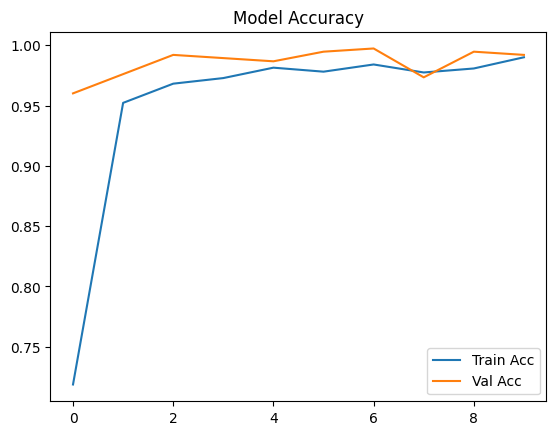

In [10]:
#grafik
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()